In [710]:
i.	Age – Işçilərin yaşı
ii.	Attrition – İşçinin məmnun olub olmaması(Türkçə işçinin yıpranması, Yes negative, No positive hesab edilir)
iii.	BusinessTravel – İş səyahətinə getmə statusu
iv.	DailyRate – 1 Günə görə aldığı məbləğ
v.	Department – İşlədiyi departament
vi.	DistanceFromHome – online işlədiyi gün sayı
vii.	Education – Bitirdiyi ali təhsil müəssisələrinin sayı
viii.	EducationField – Oxuduğu təhsil sahəsi
ix.	EmployeeCount – İşçi sayı(Bu sütunu silə bilərsiniz həmişə 1dir)
x.	EmployeeNumber – İşçinin nömrəsi(İD kimi)
xi.	EnvironmentSatisfaction – İşdəki mühitdən razılıq dərəcəsi
xii.	Gender – İşçinin cinsi
xiii.	HourlyRate – Saata görə aldığı məbləğ
xiv.	Jobİnvolvement – İşə nə dərəcədə qatılır, işə faydalıdır(Yuxarı olduqca yaxşı işçidir deməkdir)
xv.	JobLevel – Vəzifə dərəcəsi(Yuxarı rəqəm olduqca vəzifəsi daha yüksəkdir deməkdir)
xvi.	JobRole – İşlədiyi vəzifə -categorik
xvii.	JobSatisfaction – İşdən məmnuniyyəti -categorik
xviii.	MaritalStatus – Evli, dul, subay olmağı -categorik
xix.	Monthlyİncome – Aylıq Net gəlir(Vergi və s. Çıxıldıqdan sonra)
xx.	MonthlyRate – 1 aya görə aldığı məbləğ
xxi.	NumCompaniesWorked – İşlədiyi ümumi şirkət sayı
xxii.	Over18 – 18 yaşdan yuxarı olub olmaması
xxiii.	OverTime – İş saatlarından əlavə işləyib işləmədiyi
xxiv.	PercentSalaryHike – Neçə faiz maaş artımı olub
xxv.	PerformanceRating – Performans dərəcəsi(Yuxarı olduqca rəqəm yaxşı işləyir deməkdir)
xxvi.	RelationshipSatisfaction – İşdəki əlaqələrdən məmnuniyyəti(Yuxarı olduqca daha məmnun deməkdi)
xxvii.	StandardHours – Standard tamamlamalı olduğu iş saatı nə qədərdir
xxviii.	StockOptionLevel – Şirkətdə hissə dərəcəsi
xxix.	TotalWorkingYears – Ümumi iş təcrübəsi neçə ildir
xxx.	TrainingTimesLastYear – Keçən il neçə dəfə training keçməsi
xxxi.	WorkLifeBalance – Rəqəm yuxarı olduqca iş və şəxsi həyatı daha yaxşı idarə edir deməkdir
xxxii.	YearsAtCompany – Bu şirkətdə neçə ildir işləyir
xxxiii.	YearsInCurrentRole – Bu vəzifədə neçə ildir işləyir
xxxiv.	YearsSinceLastPromotion – Son vəzifə artımından(və ya maaş artımı) keçən zaman
xxxv.	YearsWithCurrManager – İndiki meneceri ilə işlədiyi illərin sayı


SyntaxError: invalid character '–' (U+2013) (2126525866.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.inspection import permutation_importance
# pip install researchpy
import researchpy as re
import scipy.stats as st



# Dataset import edirik

In [62]:
frame=pd.read_csv(r"C:\Users\hp\Downloads\HR-Employee-Attrition.csv")

In [120]:
frame

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_bins
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,"(36, 46]"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,"(46, 60]"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,"(36, 46]"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,"(26, 36]"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,"(26, 36]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,"(26, 36]"
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,"(36, 46]"
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,"(26, 36]"
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,"(46, 60]"


# Data Visualization

### Işçinin vezifesi və işlədiyi departamentinə əsasen aylik net gəlir ortalamasi

In [4]:
pivot=pd.pivot_table(data=frame,columns="JobRole",index="Department",values="MonthlyIncome",aggfunc="mean")#YearsAtCompany HourlyRate JobRole
pivot["Sum"]=pivot.sum(axis=1)
pivot

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Sum
Department,,,,,,,,,,
Human Resources,NaN,4235.75,NaN,18088.636364,NaN,NaN,NaN,NaN,NaN,22324.386364
Research & Development,7528.763359,NaN,3237.169884,17130.333333,7295.137931,16033.55,3239.972603,NaN,NaN,54464.927110
Sales,NaN,NaN,NaN,16986.972973,NaN,NaN,NaN,6924.279141,2626.0,26537.252114


In [39]:
frame.groupby(["Department","Attrition"]).agg(Age_mean=("Age","mean"),MonthlyIncome_mean=("MonthlyIncome","mean"))

Age_mean  MonthlyIncome_mean
Department             Attrition                               
Human Resources        No         39.627451         7345.980392
                       Yes        30.083333         3715.750000
Research & Development No         37.615942         6630.326087
                       Yes        33.473684         4108.075188
Sales                  No         37.135593         7232.240113
                       Yes        34.260870         5908.456522

In [54]:
int_list=[]
for i in frame.select_dtypes("int"):
    int_list.append(i)
re.summary_cont(frame[int_list])

C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2343: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2344: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,1470.0,36.9238,9.1354,0.2383,36.4564,37.3912
1,DailyRate,1470.0,802.4857,403.5091,10.5243,781.8414,823.1300
2,DistanceFromHome,1470.0,9.1925,8.1069,0.2114,8.7778,9.6073
3,Education,1470.0,2.9129,1.0242,0.0267,2.8605,2.9653
4,EmployeeCount,1470.0,1.0000,0.0000,0.0000,NaN,NaN
5,EmployeeNumber,1470.0,1024.8653,602.0243,15.7020,994.0645,1055.6661
6,EnvironmentSatisfaction,1470.0,2.7218,1.0931,0.0285,2.6658,2.7777
7,HourlyRate,1470.0,65.8912,20.3294,0.5302,64.8511,66.9313
8,JobInvolvement,1470.0,2.7299,0.7116,0.0186,2.6935,2.7663
9,JobLevel,1470.0,2.0639,1.1069,0.0289,2.0073,2.1206


In [62]:
cat_list=frame.drop(int_list,axis=1).columns
re.summary_cat(frame[cat_list])

,Variable,Outcome,Count,Percent
0,Attrition,No,1233,83.88
1,,Yes,237,16.12
2,BusinessTravel,Travel_Rarely,1043,70.95
3,,Travel_Frequently,277,18.84
4,,Non-Travel,150,10.20
5,Department,Research & Development,961,65.37
6,,Sales,446,30.34
7,,Human Resources,63,4.29
8,EducationField,Life Sciences,606,41.22
9,,Medical,464,31.56


In [119]:
group=frame.groupby(["Gender","Attrition","MaritalStatus"]).agg(PercentSalryHike=("PercentSalaryHike","mean"))

def percentage_func(value):
    return f"{value:.2f}%"
group["PercentSalryHike_Mean"]=group["PercentSalryHike"].apply(percen3tage_func)
group.drop("PercentSalryHike",axis=1,inplace=True)
group

PercentSalryHike_Mean
Gender Attrition MaritalStatus                      
Female No        Divorced                     15.18%
                 Married                      15.33%
                 Single                       14.97%
       Yes       Divorced                     14.33%
                 Married                      15.06%
                 Single                       15.55%
Male   No        Divorced                     15.02%
                 Married                      15.44%
                 Single                       15.17%
       Yes       Divorced                     14.96%
                 Married                      14.26%
                 Single                       15.56%

In [117]:
frame["Age_bins"]=pd.cut(frame["Age"],bins=(18,26,36,46,60))
group_1=frame.groupby("Age_bins").agg({"MonthlyIncome":"median"})
group_1

,MonthlyIncome
Age_bins,
"(18, 26]",2860.0
"(26, 36]",4496.0
"(36, 46]",5771.0
"(46, 60]",10499.0


### Departamentler uzre Attrition sayi

<AxesSubplot:xlabel='Department', ylabel='count'>

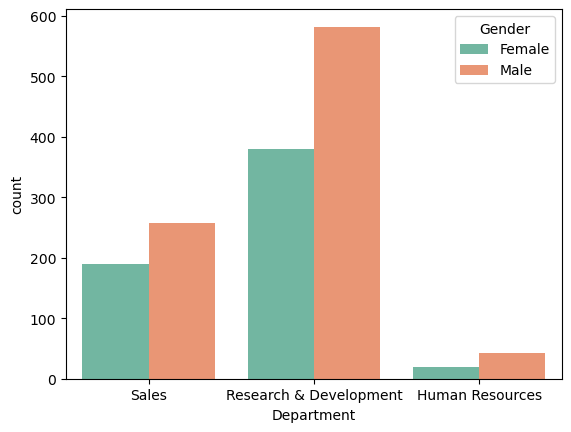

In [6]:
sns.countplot(data=frame,x="Department",palette="Set2",hue="Gender")

### Attrition olmush ve olmamish isciler uzre sayi nisbeti

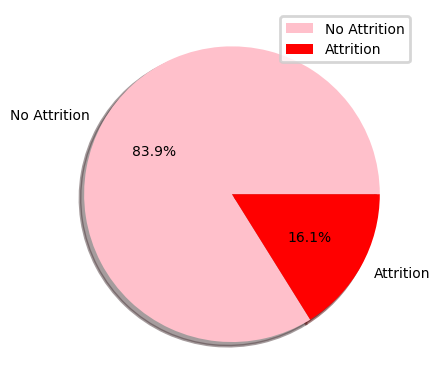

In [781]:
target=frame.iloc[:,1].value_counts()
color=["pink","red"]
plt.pie(target,labels=["No Attrition","Attrition"],colors=color,autopct = "%1.1f%%",shadow=True)
plt.rcParams['patch.linewidth'] = 2
plt.rcParams['patch.edgecolor'] = 'red'
plt.legend(loc = 1)
plt.show()

# Attrition olunmush ve olunmamish iscilerin evlilik statuslari 

([<matplotlib.patches.Wedge at 0x1d4a77ecac0>,
 [Text(0.9964244374501308, 0.46598105160209097, 'Divorced'),
  Text(-0.44607782667781953, 1.005492204120148, 'Married'),
  Text(-0.021870424679261313, -1.0997825623841966, 'Single')],
 [Text(0.5435042386091622, 0.2541714826920496, '13.92%'),
  Text(-0.24331517818790155, 0.5484502931564443, '35.44%'),
  Text(-0.01192932255232435, -0.5998813976641071, '50.63%')])

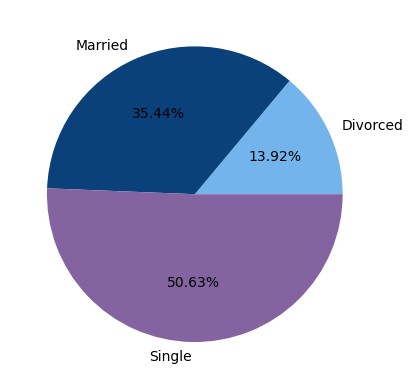

In [51]:
group=frame[frame["Attrition"]=="Yes"]
color=["#72b4eb","#0a417a","#8464a0"]
group.groupby("MaritalStatus")["Attrition"].count()
plt.pie(x=group.groupby("MaritalStatus")["Attrition"].count().values,
        labels=group.groupby("MaritalStatus")["Attrition"].count().index,autopct="%.2f%%",colors=color)


([<matplotlib.patches.Wedge at 0x1d4a61d13d0>,
 [Text(0.8055395765571517, 0.7490700839041197, 'Divorced'),
  Text(-1.0888217160391385, 0.15642017351219675, 'Married'),
  Text(0.6908357778791797, -0.856005799046986, 'Single')],
 [Text(0.4393852235766281, 0.4085836821295198, '23.84%'),
  Text(-0.5939027542031664, 0.0853200946430164, '47.77%'),
  Text(0.3768195152068253, -0.46691225402562864, '28.39%')])

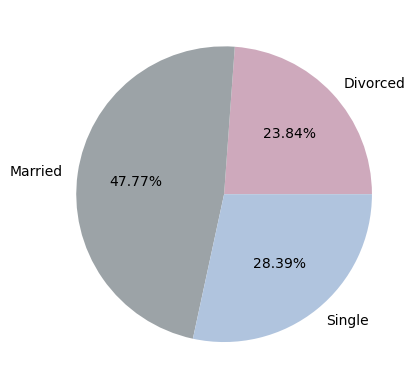

In [58]:
group_no=frame[frame["Attrition"]=="No"]
color=['#CEA9BC', '#9CA3A7', '#B0C4DE']
group_no.groupby("MaritalStatus")["Attrition"].count()
plt.pie(x=group_no.groupby("MaritalStatus")["Attrition"].count().values,
        labels=group_no.groupby("MaritalStatus")["Attrition"].count().index,autopct="%.2f%%",colors=color)

### Cinsiyyet uzrə Attriton olmuş ve olmamiş işçi saylari

<AxesSubplot:xlabel='Attrition', ylabel='count'>

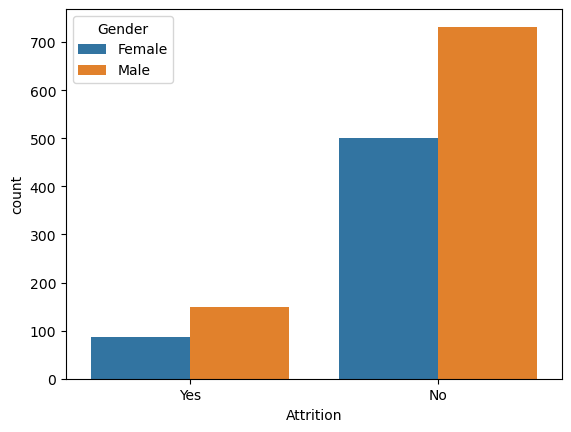

In [756]:
# Attrition olumus iscilerin sayi (qadin ve kisi)
sns.countplot(data=frame,x="Attrition",dodge=True,hue="Gender")

### Attrtion olmuş və olmamish ishçilerin ayliq qazanc paylanmasi

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

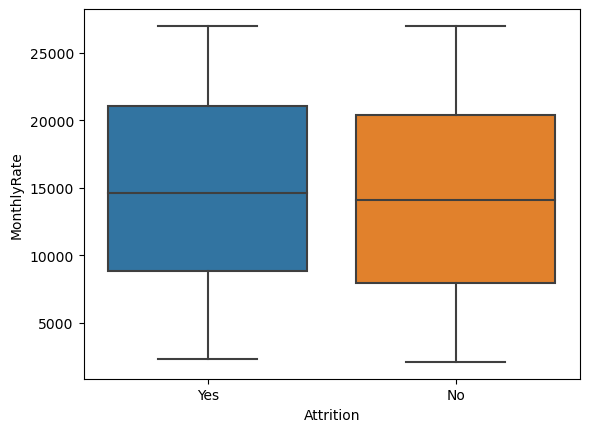

In [803]:
sns.boxplot(data=frame,x="Attrition",y="MonthlyRate")

# Evlilik statusuna  esasen attritionlar

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

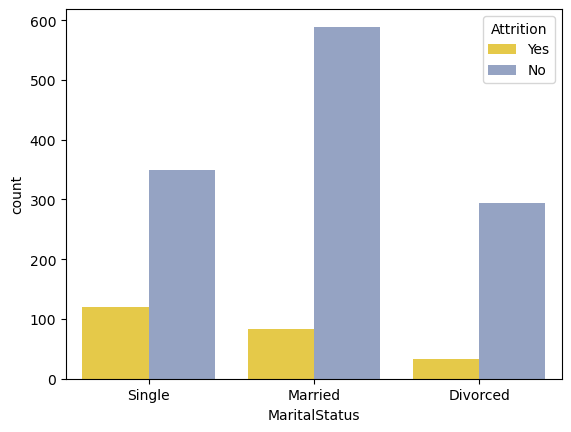

In [20]:
sns.countplot(x="MaritalStatus",hue="Attrition",data=frame,palette="Set2_r")

# Attrtion olmuş və olmamish ishçilerin ayliq yaşlarin paylanmasi

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

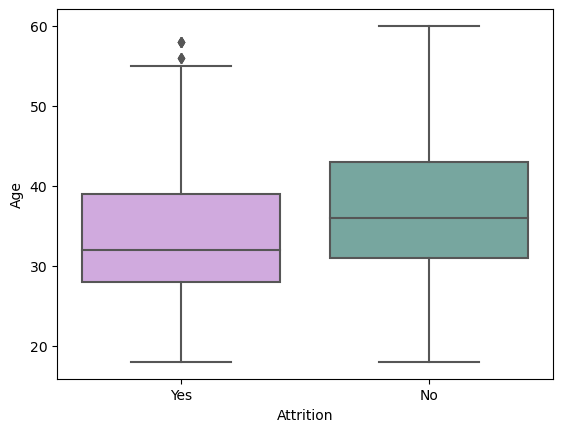

In [19]:
sns.boxplot(x="Attrition",y="Age",data=frame,palette=["#D4A1E7","#6faea4"])

# Yaşlara əsasən attrition olmuş və olmamish insanlarin sayi 

<AxesSubplot:xlabel='Age', ylabel='Count'>

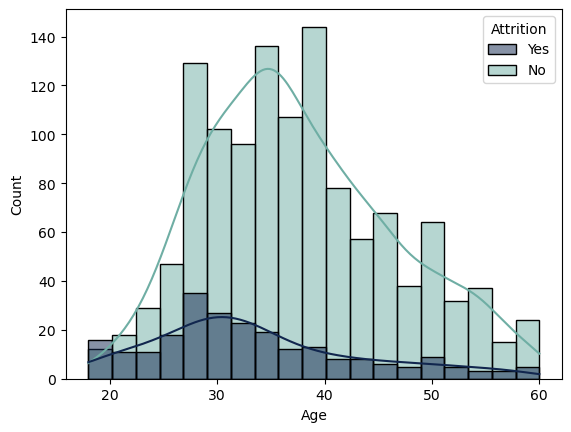

In [21]:
sns.histplot(x="Age",hue="Attrition",data=frame,kde=True,palette=["#11264e","#6faea4"])

# Ayliq gəlirə əsasən attrition olmuş və olmamish insanlarin sayi 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

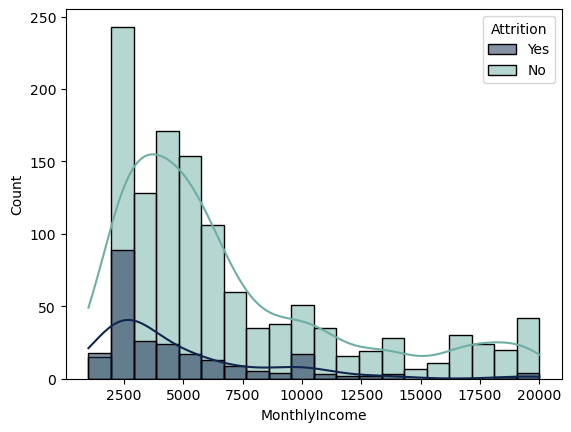

In [24]:
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=frame,palette=["#11264e","#6faea4"])

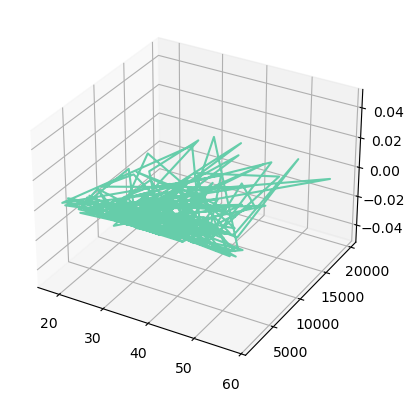

In [107]:
ax=plt.axes(projection="3d")
ax.plot3D(k,y,color="#66CDAA",)

# Ortalama ayliq gelir hansi araligda olmalidir ki,həmin işçilər attrition olsun və ya olmasin (guven emsali 95%)

In [5]:
import statsmodels.stats.api as sms

In [9]:
yesattrition=frame[frame["Attrition"]=="Yes"]["MonthlyIncome"]
np.round(sms.DescrStatsW(yesattrition).tconfint_mean(),2)


array([4321.26, 5252.93])

In [12]:
noattrition=frame[frame["Attrition"]=="No"]["MonthlyIncome"]
np.round(sms.DescrStatsW(noattrition).tconfint_mean(),2)

array([6563.54, 7101.94])

# Ishcilerin attrition olunma ehtimali ne qederdir.

In [23]:
print("{}%".format(np.round(yesattrition.count()/frame["Attrition"].count(),2)*100))

16.0%


# Ilk olaraq qurduğumuz modelin hansi problemi həll etdiyini təyin edirik(Attrition)

In [713]:
frame

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [714]:
frame.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [715]:
frame.head(10).iloc[:,10:20]

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
0,2,Female,94,3,2,Sales Executive,4,Single,5993,19479
1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907
2,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396
3,4,Female,56,3,1,Research Scientist,3,Married,2909,23159
4,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632
5,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864
6,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964
7,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335
8,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787
9,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577


In [716]:
frame.tail(10).iloc[:,10:20]

,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate
1460,4,Female,73,2,1,Research Scientist,1,Single,3785,8489
1461,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586
1462,2,Female,60,2,4,Sales Executive,4,Married,12031,8828
1463,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787
1464,4,Female,30,2,1,Sales Representative,3,Single,2966,21378
1465,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290
1466,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457
1467,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174
1468,4,Male,63,2,2,Sales Executive,2,Married,5390,13243
1469,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228


# Dataya ümumi nəzər yetirək

In [30]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Paylanmaya nəzər yetirək

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

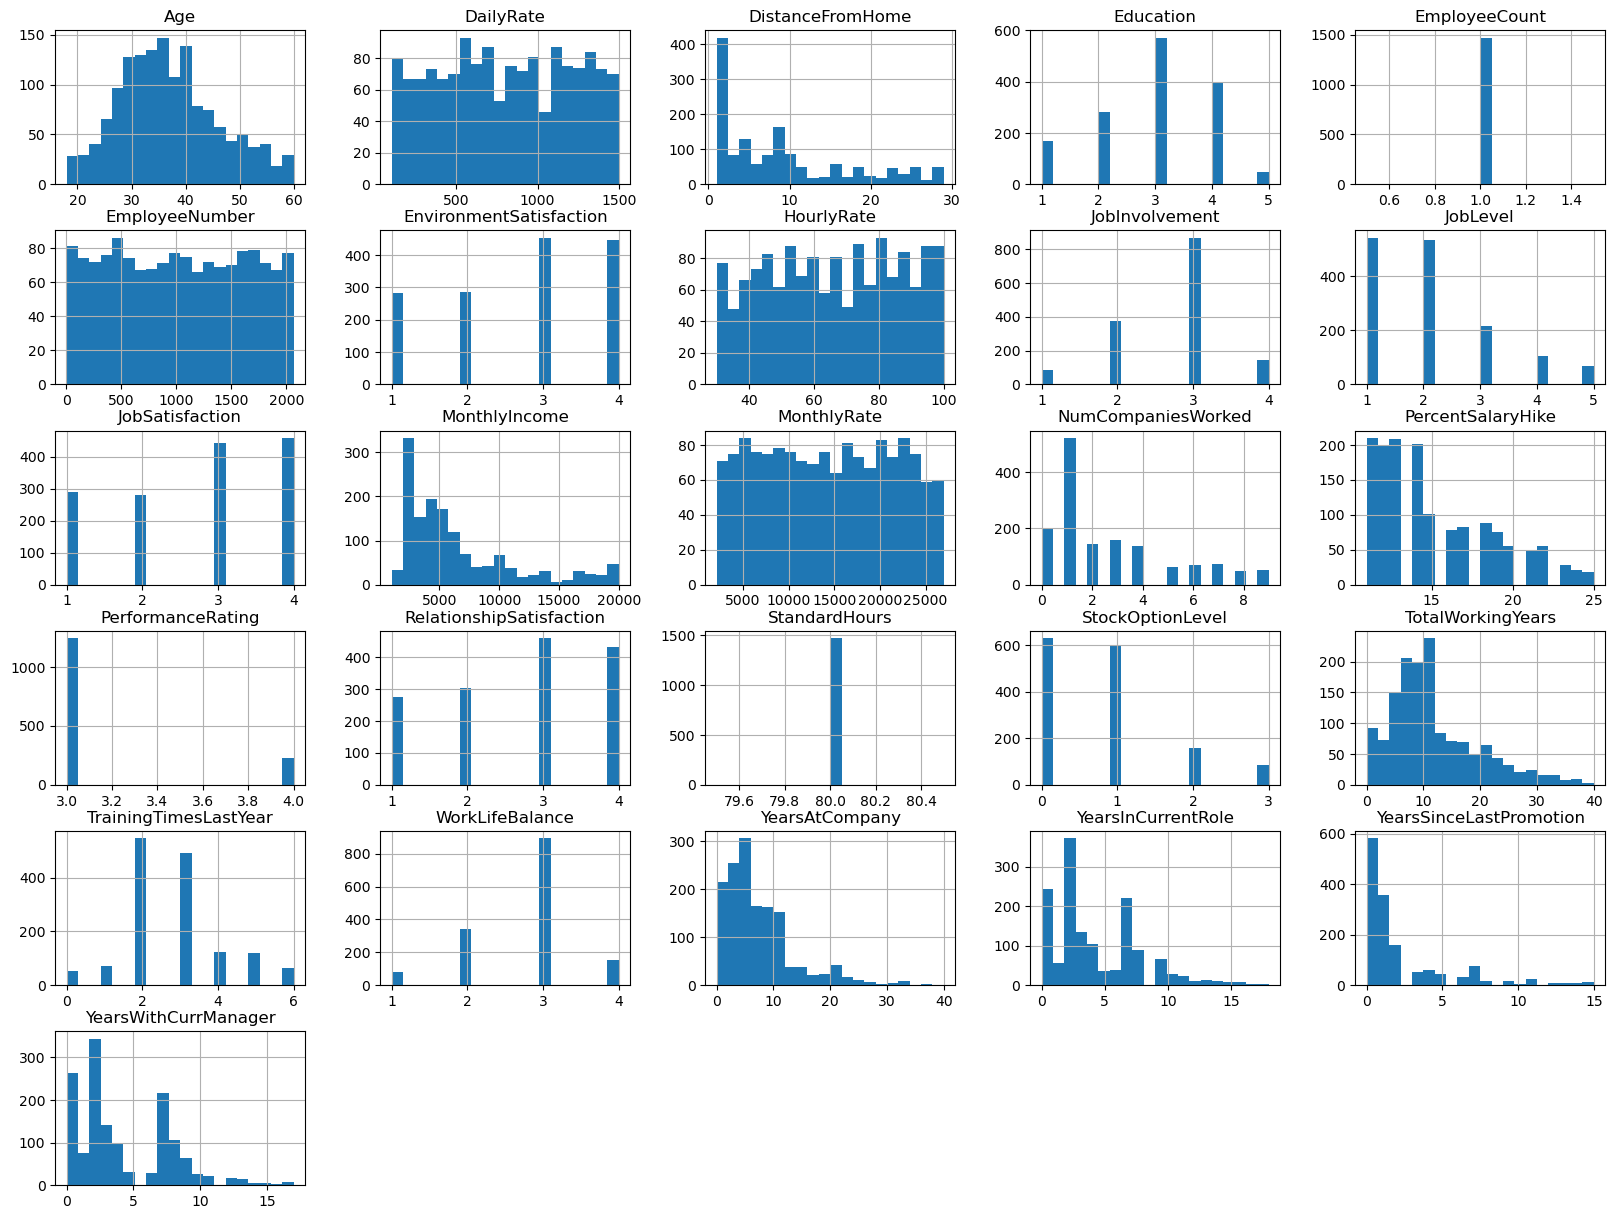

In [718]:
#Ilk olaraq qurdugumuz modelin hansi problemi hell etdiyini teyin edirik(Attrition)
frame.hist(bins=20, figsize=(20,15))

In [7]:
frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [17]:
frame.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [16]:
frame.describe(include="int").T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Corr matrixe edirik

<AxesSubplot:>

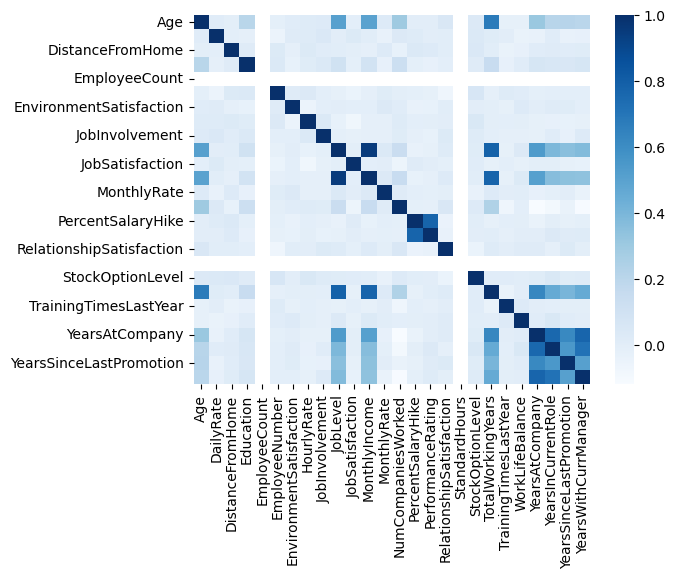

In [720]:
sns.heatmap(frame.corr(),cmap="Blues")

In [32]:
frame.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [724]:
# upper = frame_corr.where(np.triu(np.ones(frame_corr.shape),k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.50)] #neticeni 0 ra endirir deye tetbiq etmedim

In [726]:
# for i in frame.columns:
#     print("-------------------")
#     print(i,frame[i].nunique())

In [727]:
#Modeli secmezden once lazimsiz sutunlari atmaliyiq nezere carpan sutunlar (feature importance etdikde sonrada cixarilan sutunlar bura daxildir)
frame.drop(["EmployeeNumber",'EmployeeCount','StandardHours',"Over18","Education","PerformanceRating","Gender","JobInvolvement","PercentSalaryHike","EducationField"],axis=1,inplace=True)

In [728]:
frame.select_dtypes("object")

,Attrition,BusinessTravel,Department,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Laboratory Technician,Married,No
...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Sales Executive,Married,No


# LabelEncoder

In [729]:
#Categorik sutunlari labeLEncoder edirik
le=LabelEncoder()
for i in frame.select_dtypes('object').columns:
    frame[i]=le.fit_transform(frame[i])


In [730]:
frame["Attrition"].value_counts(dropna=False)

0    1233
1     237
Name: Attrition, dtype: int64

In [731]:
# age,dailyrate,DistanceFromHome,MonthlyRate,MonthlyIncome,HoursRate,Totalworkingyears,PercentSalaryHike,YearsinCurrentRole,
# YearsAtCompany,YearsWithCurrManager categorik olmayan sutunlar

# Train_test_split ve OverSampler 

In [732]:
# datayi train ve test datasi olaraq tenzimleyirik cunki data az oldugu ucun auc score 0.57 olurdu 
x=frame.drop(["Attrition"],axis=1)
y=frame["Attrition"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=30,stratify=y)
# RandomOverSampler
over=RandomOverSampler(random_state=41)
x_over_train,y_over_train=over.fit_resample(x_train,y_train)

In [733]:
# Train ve test datasindan lazimsiz sutunlari cixaririq 
# x_over_train.drop(["Education","PerformanceRating","Gender","JobInvolvement","PercentSalaryHike"],axis=1,inplace=True)

In [734]:
y_over_train.value_counts()

1    1048
0    1048
Name: Attrition, dtype: int64

# En uyğun modelin seçilməsi

In [735]:
# Bu modelde en yaxsi modeli teyin edirik (base)
log_reg=LogisticRegression()
rf=RandomForestClassifier()
svm=SVC()
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC()
]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {type(model).__name__} - Accuracy: {accuracy}")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression - Accuracy: 0.8416289592760181
Model: RandomForestClassifier - Accuracy: 0.8506787330316742
Model: SVC - Accuracy: 0.8371040723981901


# GridsearchCV

In [736]:
param_grid={
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [397]:
# # Basic olaraq model asaagi performans gosterdiyi ucun Gridsearch ederek en yaxsi parametrlerle yeniden modeli train edecik
grid = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 8,n_jobs=-1,return_train_score=True)
grid.fit(x_over_train,y_over_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True)

In [308]:
grid.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [396]:
grid.best_score_

0.9760843774837533

# CrosValidation 

In [737]:
# Modelimizin daha duzgun texminler vermesi ucun 0 ve 1 lerin icersinde 1 lere daha cox agirlig vermesi ucun parametri 
# onceden tenzimleyirik
class_weight={}#Class_weight etdikde netice cox asagi dusur ona gore defeault olaraq isledecem
class_weight[0]=0.5
class_weight[1]=0.5
#cross validation edirik daha etibarli netice almagdan otru
rf1=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=31,class_weight=class_weight,max_features="auto", 
                          min_samples_leaf=2,min_samples_split=3)

In [738]:

rf1.fit(x_over_train,y_over_train)
kf = KFold(shuffle=True, random_state=72018, n_splits=5)
score=cross_val_score(rf1,x_train,y_train,cv=kf)
print("score :{}".format(score.mean()))

score :0.8518971887550201


# Scores

In [739]:
y_pred=rf1.predict(x_test)

In [740]:
print("train_score: {}".format(rf1.score(x_over_train, y_over_train)))
print("test_score: {}".format(rf1.score(x_test, y_test)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred)))

train_score: 0.808206106870229
test_score: 0.7873303167420814
roc_auc_score: 0.7387387387387386


In [741]:
confusion_matrix(y_test,y_pred)

array([[150,  35],
       [ 12,  24]], dtype=int64)

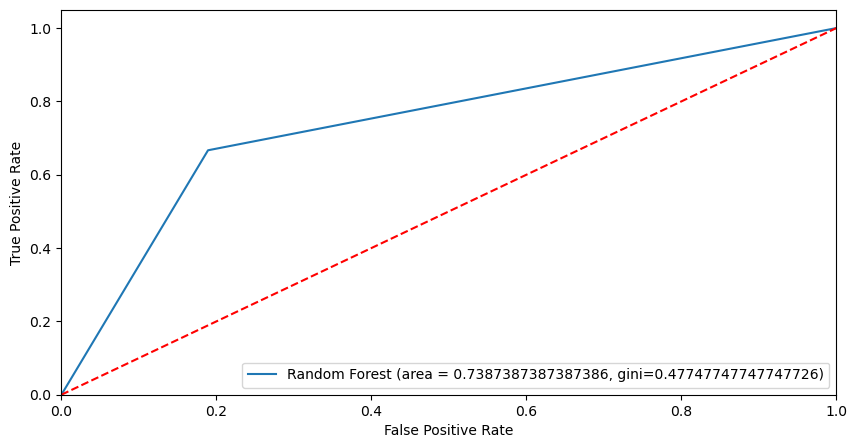

In [501]:
random_forest_roc_auc = roc_auc_score(y_test,rf1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf1.predict(x_test))
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f'Random Forest (area = {random_forest_roc_auc}, gini={2*random_forest_roc_auc-1})')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# feature_importances_ ederek neticeni texmin etmək üçün təsirsiz olan columlari çixardiriq

In [502]:
rf1.feature_importances_

array([0.07347981, 0.01090078, 0.02223586, 0.02404902, 0.02001168,
       0.02163713, 0.01318081, 0.06370759, 0.0398854 , 0.01818451,
       0.03051132, 0.13489583, 0.01157287, 0.02108724, 0.17215863,
       0.00224331, 0.05448885, 0.07203703, 0.00839848, 0.01064195,
       0.06444904, 0.03510725, 0.00989943, 0.06523619])

<BarContainer object of 24 artists>

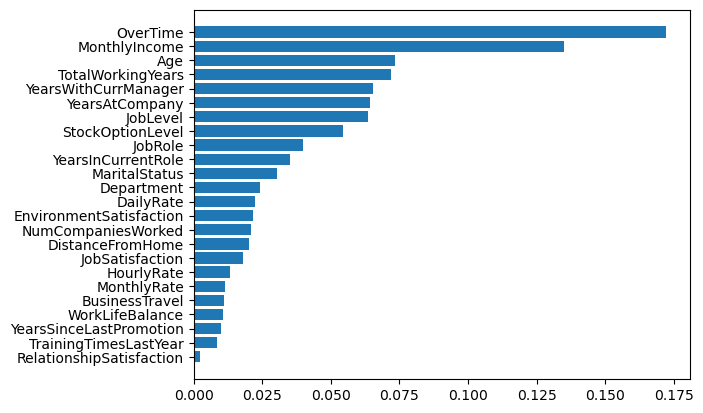

In [503]:
index=rf1.feature_importances_.argsort()
plt.barh(rf1.feature_names_in_[index],rf1.feature_importances_[index])
# Education,PerformanceRating,Geneder,JobInvolvement,PercentSalary

# Shap

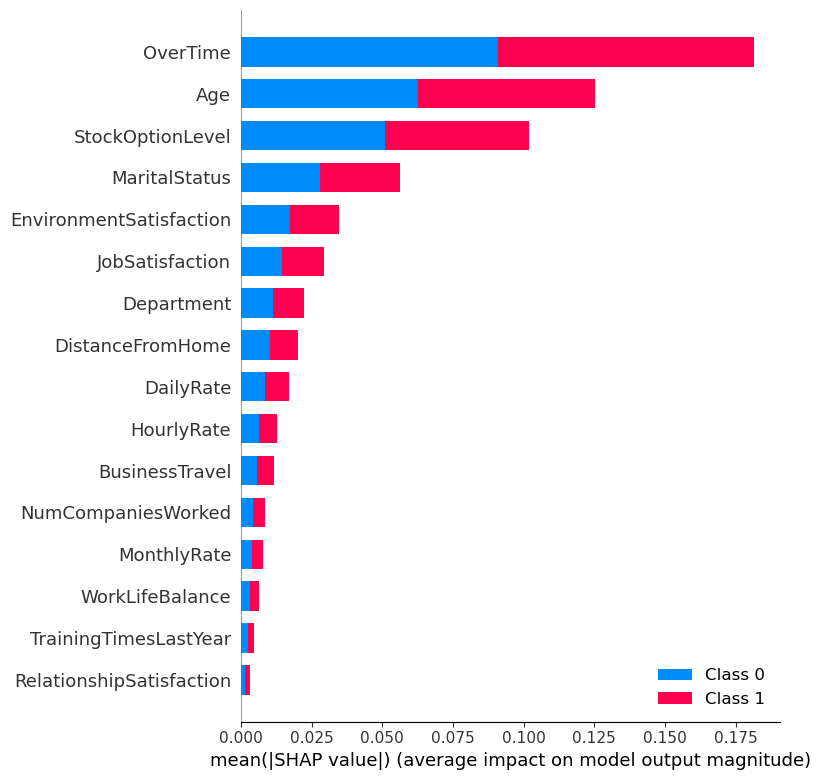

In [567]:
import shap
masker=shap.maskers.Independent(data=x_ower_train)
explainer=shap.TreeExplainer(rf1,masker=masker)
shap_values=explainer.shap_values(x_over_train)
shap.summary_plot(shap_values,x_over_train)#,plot_type="bar")


# 2.HİSSƏ

### Boosting algoritmasini işlədəcəm

In [50]:
df=pd.read_csv(r"C:\Users\hp\Downloads\HR-Employee-Attrition.csv")

In [51]:
import catboost as cat

In [52]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Lazimsiz sütunlari atiriq

In [53]:
df.drop(["EmployeeNumber","Over18"],axis=1,inplace=True)

In [54]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## LabelEncoder etməyimizin səbəbi Grid search etmək üçün object sütunlarin  çevrilməsi gərəkir

In [55]:
le1=LabelEncoder()
for i in df.select_dtypes('object').columns:
    df[i]=le1.fit_transform(df[i])

In [56]:
x=df.drop(["Attrition"],axis=1)
y=df["Attrition"]

## Dataseti Train ve Test olaraq 2 hissəyə ayiririq

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=41,stratify=y)

# GridSearchCv edib ən uyğun parametrləri təyin edirik


In [58]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001], 
    'depth': [4, 6, 8], 
    'l2_leaf_reg': [1, 3, 5]  
}

In [59]:
grid=GridSearchCV(estimator=ct,param_grid=param_grid,cv=8,n_jobs=-1,return_train_score=True)
grid.fit(x_train,y_train)

0:	learn: 0.6281643	total: 68.8ms	remaining: 6.82s
1:	learn: 0.5833325	total: 83.4ms	remaining: 4.08s
2:	learn: 0.5456172	total: 102ms	remaining: 3.28s
3:	learn: 0.5130943	total: 109ms	remaining: 2.61s
4:	learn: 0.4777479	total: 114ms	remaining: 2.17s
5:	learn: 0.4459998	total: 119ms	remaining: 1.87s
6:	learn: 0.4241676	total: 125ms	remaining: 1.66s
7:	learn: 0.4079503	total: 131ms	remaining: 1.5s
8:	learn: 0.3848449	total: 136ms	remaining: 1.37s
9:	learn: 0.3693640	total: 141ms	remaining: 1.27s
10:	learn: 0.3547572	total: 145ms	remaining: 1.18s
11:	learn: 0.3381096	total: 150ms	remaining: 1.1s
12:	learn: 0.3256677	total: 155ms	remaining: 1.03s
13:	learn: 0.3146354	total: 159ms	remaining: 979ms
14:	learn: 0.3044653	total: 164ms	remaining: 930ms
15:	learn: 0.2973729	total: 169ms	remaining: 887ms
16:	learn: 0.2859214	total: 174ms	remaining: 848ms
17:	learn: 0.2753636	total: 178ms	remaining: 812ms
18:	learn: 0.2670208	total: 183ms	remaining: 780ms
19:	learn: 0.2589748	total: 188ms	remaini

GridSearchCV(cv=8,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000026AE6EBDE50>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.01, 0.001]},
             return_train_score=True)

In [66]:
grid.best_params_

{'depth': 8, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

## Modelimize en yaxsi parametlerlerle modelimizi yeniden test ve train datasini fit edirik

In [60]:
class_weight={}
class_weight[0]=0.1
class_weight[1]=0.9

In [61]:
ct=cat.CatBoostClassifier(iterations=100,learning_rate=0.1,depth=3,class_weights=class_weight,random_state=41,l2_leaf_reg=5)#'l2_leaf_reg': 1 olaraq istifade etdikdescore train score 84 testcore83 olur
ct.fit(x_train,y_train,cat_features=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'])


0:	learn: 0.6618716	total: 17.9ms	remaining: 1.77s
1:	learn: 0.6381890	total: 31.4ms	remaining: 1.54s
2:	learn: 0.6233825	total: 48.9ms	remaining: 1.58s
3:	learn: 0.6075878	total: 65.4ms	remaining: 1.57s
4:	learn: 0.5974020	total: 82.3ms	remaining: 1.56s
5:	learn: 0.5877511	total: 100ms	remaining: 1.57s
6:	learn: 0.5760706	total: 118ms	remaining: 1.57s
7:	learn: 0.5682917	total: 135ms	remaining: 1.55s
8:	learn: 0.5610049	total: 148ms	remaining: 1.49s
9:	learn: 0.5530869	total: 166ms	remaining: 1.49s
10:	learn: 0.5468732	total: 183ms	remaining: 1.48s
11:	learn: 0.5423709	total: 201ms	remaining: 1.48s
12:	learn: 0.5374793	total: 221ms	remaining: 1.48s
13:	learn: 0.5326011	total: 239ms	remaining: 1.47s
14:	learn: 0.5282303	total: 256ms	remaining: 1.45s
15:	learn: 0.5246312	total: 274ms	remaining: 1.44s
16:	learn: 0.5207815	total: 290ms	remaining: 1.42s
17:	learn: 0.5167036	total: 307ms	remaining: 1.4s
18:	learn: 0.5141958	total: 323ms	remaining: 1.38s
19:	learn: 0.5115157	total: 339ms	rem

# Score`lar

In [21]:
print("train_score : {}".format(ct.score(x_train,y_train)))
print("test_score : {}".format(ct.score(x_test,y_test)))
print("accuracy_score : {}".format(accuracy_score(y_test,y_pred)))

train_score : 0.7878302642113691
test_score : 0.7782805429864253
accuracy_score : 0.7782805429864253


In [17]:
y_pred=ct.predict(x_test)

In [22]:
confusion_matrix(y_test,y_pred)

array([[142,  43],
       [  6,  30]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       185
           1       0.41      0.83      0.55        36

    accuracy                           0.78       221
   macro avg       0.69      0.80      0.70       221
weighted avg       0.87      0.78      0.80       221



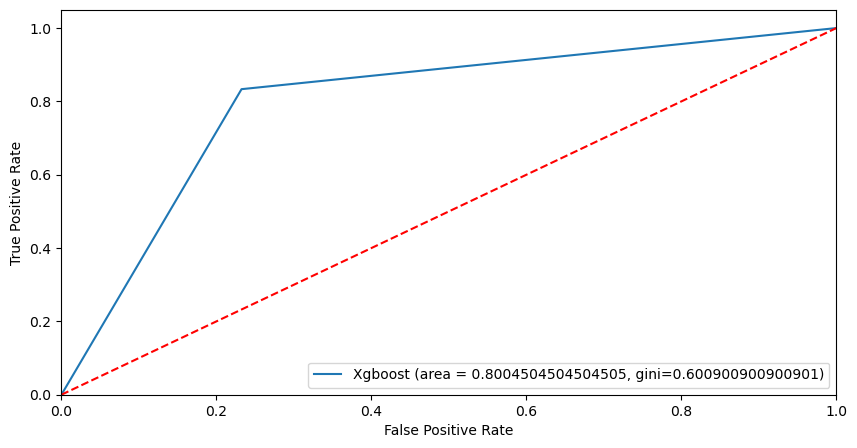

In [24]:
random_forest_roc_auc = roc_auc_score(y_test,ct.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, ct.predict(x_test))
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label=f'Xgboost (area = {random_forest_roc_auc}, gini={2*random_forest_roc_auc-1})')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Shap'dan istifadə edərək lazimsiz sütunlari təyin edib atiriq
### Yenidən kod run edildiyi ücün lazimsiz sütunlar qrafikdə yer almir

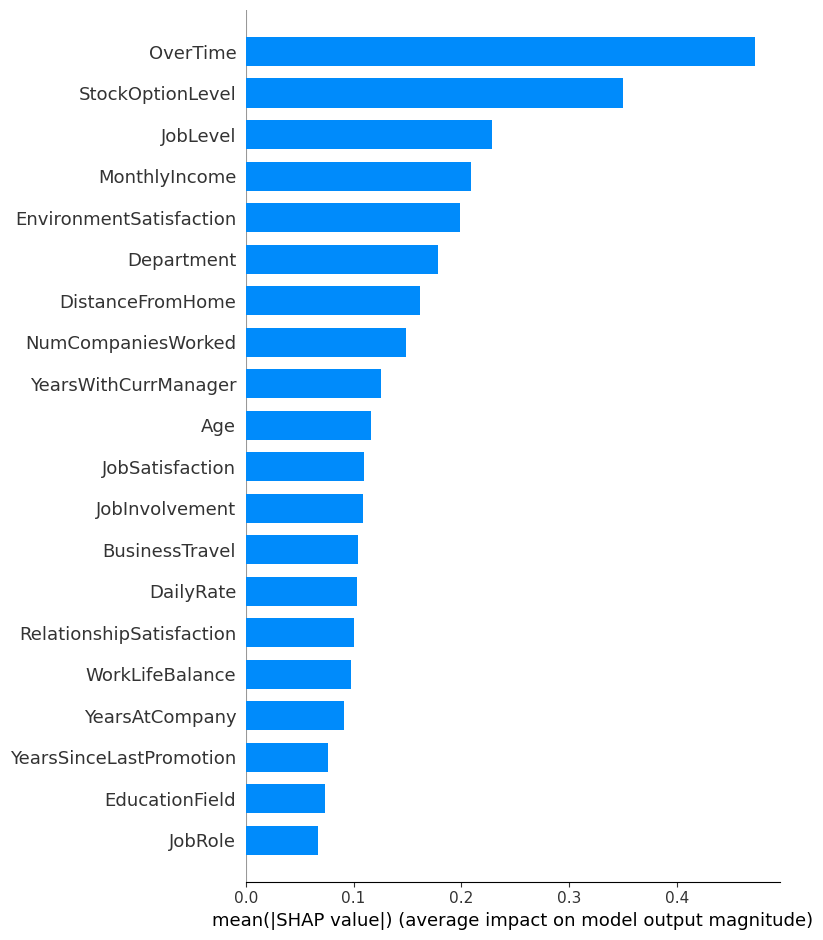

In [25]:
import shap
masker=shap.maskers.Independent(data=x_train)
explainer=shap.TreeExplainer(ct,masker=masker)
shap_values=explainer.shap_values(x_train)
shap.summary_plot(shap_values,x_train,plot_type="bar")

# permutation_importances_ edərək n
ticəni təxmin etmək üçün təsirsiz olan columlari çixardiriq

In [29]:
per=permutation_importance(ct,x_train,y_train)

<BarContainer object of 32 artists>

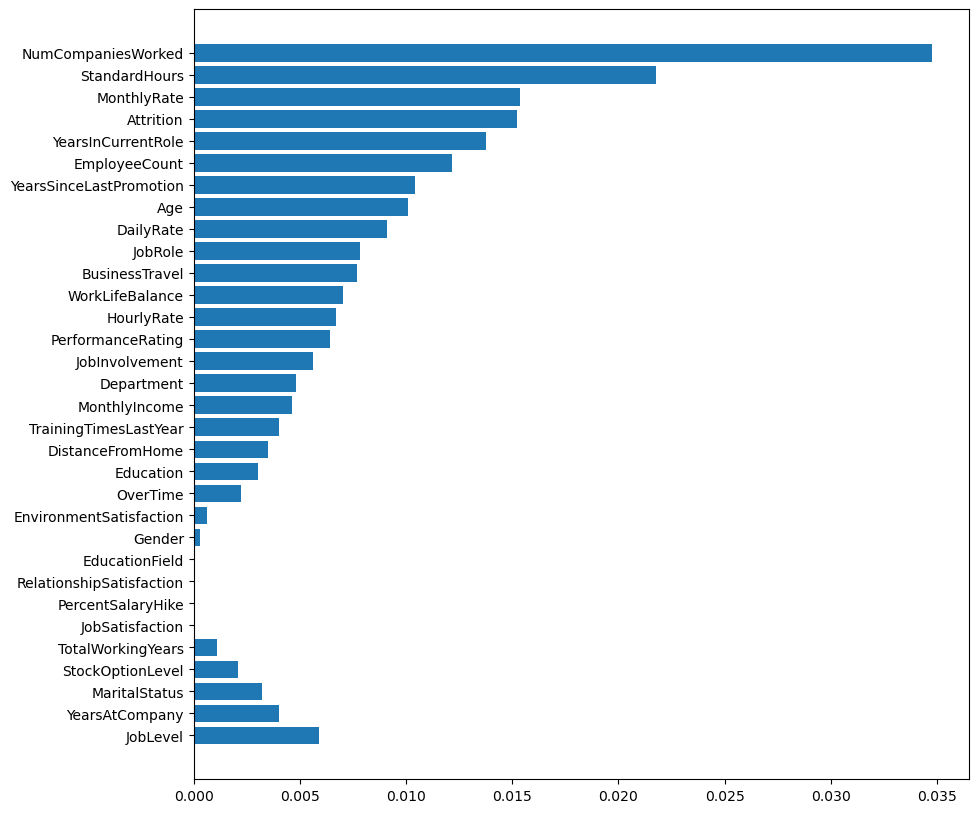

In [30]:
plt.figure(figsize=(10,10))
index=per.importances_mean.argsort()
plt.barh(df.columns[index],abs(per.importances_mean)[index])